In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/spam.csv', encoding='latin-1')]

In [3]:
messages[20]

'spam,"England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+",,,'

In [4]:
print(len(messages))

5575


In [5]:
for message_no,message in enumerate(messages):
    print(message_no,message)
    print('\n')

0 v1,v2,,,


1 ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,


2 ham,Ok lar... Joking wif u oni...,,,


3 spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,


4 ham,U dun say so early hor... U c already then say...,,,


5 ham,"Nah I don't think he goes to usf, he lives around here though",,,


6 spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,


7 ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,


8 ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,


9 spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize r

In [6]:
messages = pd.read_csv('smsspamcollection/spam.csv',encoding='latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [8]:
messages

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
messages = messages.rename(columns={'v1': 'Label','v2':'Message'})

In [10]:
messages

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
messages.shape

(5572, 2)

In [14]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages.value_counts()

Label  Message                                                                                                                                                                                                      
ham    Sorry, I'll call later                                                                                                                                                                                           30
       I cant pick the phone right now. Pls send a message                                                                                                                                                              12
       Ok...                                                                                                                                                                                                            10
spam   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£

In [16]:
messages['Length'] = messages['Message'].apply(len)

In [17]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Exploratory Data Analysis

In [18]:
sns.set_style('darkgrid')
sns.set_palette('twilight_shifted')

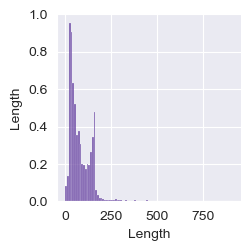

In [19]:
sns.pairplot(data = messages)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

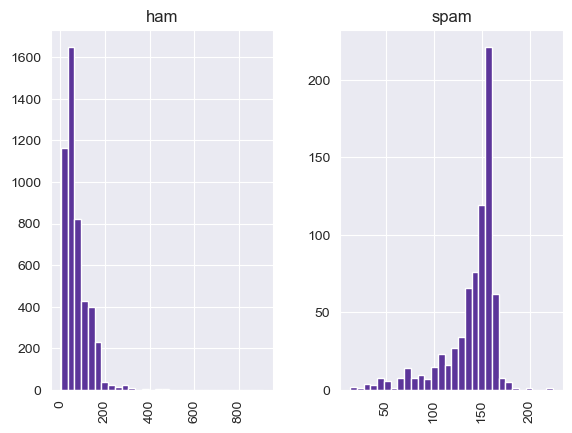

In [20]:
messages.hist(column = 'Length',by = 'Label',bins = 30 )

In [21]:
messages.Length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Length, dtype: float64

In [22]:
messages[messages['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [23]:
import string
from nltk.corpus import stopwords


In [24]:
def txt_processing(mess):
    nopunct = [char for char in mess if char not in string.punctuation ]
    nopunct = ''.join(nopunct)
    return [word for word in nopunct.split() if word.lower() not in stopwords.words('english')]

In [25]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
messages['Message'].head(5).apply(txt_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [27]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Train a Model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
bow_transformer = CountVectorizer(analyzer = txt_processing).fit(messages['Message'])

In [31]:
print(len(bow_transformer.vocabulary_))

11304


In [ ]:
messages_bow = bow_transformer.transform(messages['Message'])

In [ ]:
print('Shape of Sparse Matrix',messages_bow.shape)

In [ ]:
messages_bow.nnz

In [ ]:
tfidf_transformer  = TfidfTransformer().fit(messages_bow)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['Message'],messages['Label'],test_size = 0.3)

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
from sklearn.pipeline import Pipeline

In [53]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer = txt_processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [54]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function txt_processing at 0x00000186A9D9C3A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [55]:
predict_spam = pipeline.predict(msg_test)

# Evaluation of Model

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(label_test,predict_spam))
print('\n')
print(confusion_matrix(label_test,predict_spam))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1442
        spam       1.00      0.65      0.79       230

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



[[1442    0]
 [  80  150]]
